# Project.3 - Red Wine Quality Prediction

Data description : In this dataset, classes are ordered, but it was not balanced. Good wine are less then the not Good Wine These are the name of Features from the dataset -:

fixed acidity

volatile acidity

citric acid

residual

sugar	chlorides

free sulfur

dioxide	total

sulfur dioxide

density

pH

sulphates

alcohol

quality

In [1]:
# importing the libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')



In [121]:
#loading the data set 
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [122]:
df.shape

(1599, 12)

Observation: dataset contains the 13 columns and 1600 rows 

In [123]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Observation: 12 variables contains float data type and  One column contain s intger data types 

####EDA process

In [124]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Observation: there is no null values in data types

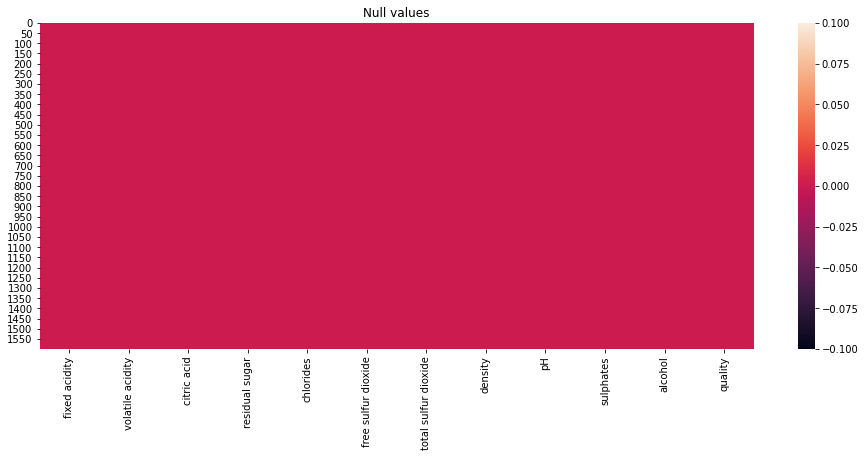

In [125]:
#Heat map to check the null values

plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

Observation: We clearly see that there is no values in heat map

In [126]:
#to check the classification in target variable
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Observation: 
1. 681 rows have the wine quality is 5, its the highest population in the target variable 
2. highest wine quality is the 8 and population is 18
3. target vaiable have 6 classfication 

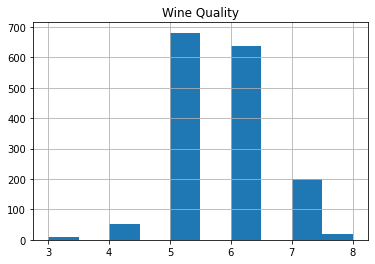

In [127]:
df['quality'].hist(grid=True)
plt.title('Wine Quality')
plt.show()

Observation: highest population of classification is 5  and lowest population of wine qaulity is 3 

Task: we have to convert 5 classification to 2 , we have set an arbitrary cutoff for your dependent 
variable (wine quality) at e.g. 7 or
higher getting classified as 'good/1' and the remainder as 'not good/0'.

In [128]:
df['best quality']=[1 if x>=7 else 0 for x in df.quality]
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


Observation: We have added  "Best quality" column to dataset based which wine quality has more then 7 points  that is GOOD (1)
and which wine scores below 7 points that is not good (0)

In [1]:
#univariate analysis
sns.countplot(df['best quality'])
plt.show()

NameError: name 'sns' is not defined

Observation: We clearly see that population of good quality wine is less compare to the not good wine

In [130]:
#to check the classification in target variable
df['best quality'].value_counts()

0    1382
1     217
Name: best quality, dtype: int64

Observation: good wine quality is underpopulated so need to treat the data "over sampling or undersampling"

In [131]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


# Observation:Quality of the wine mean is 5.63, 75% of the quality of wine is 6

Mean of the alcohol is 10.422

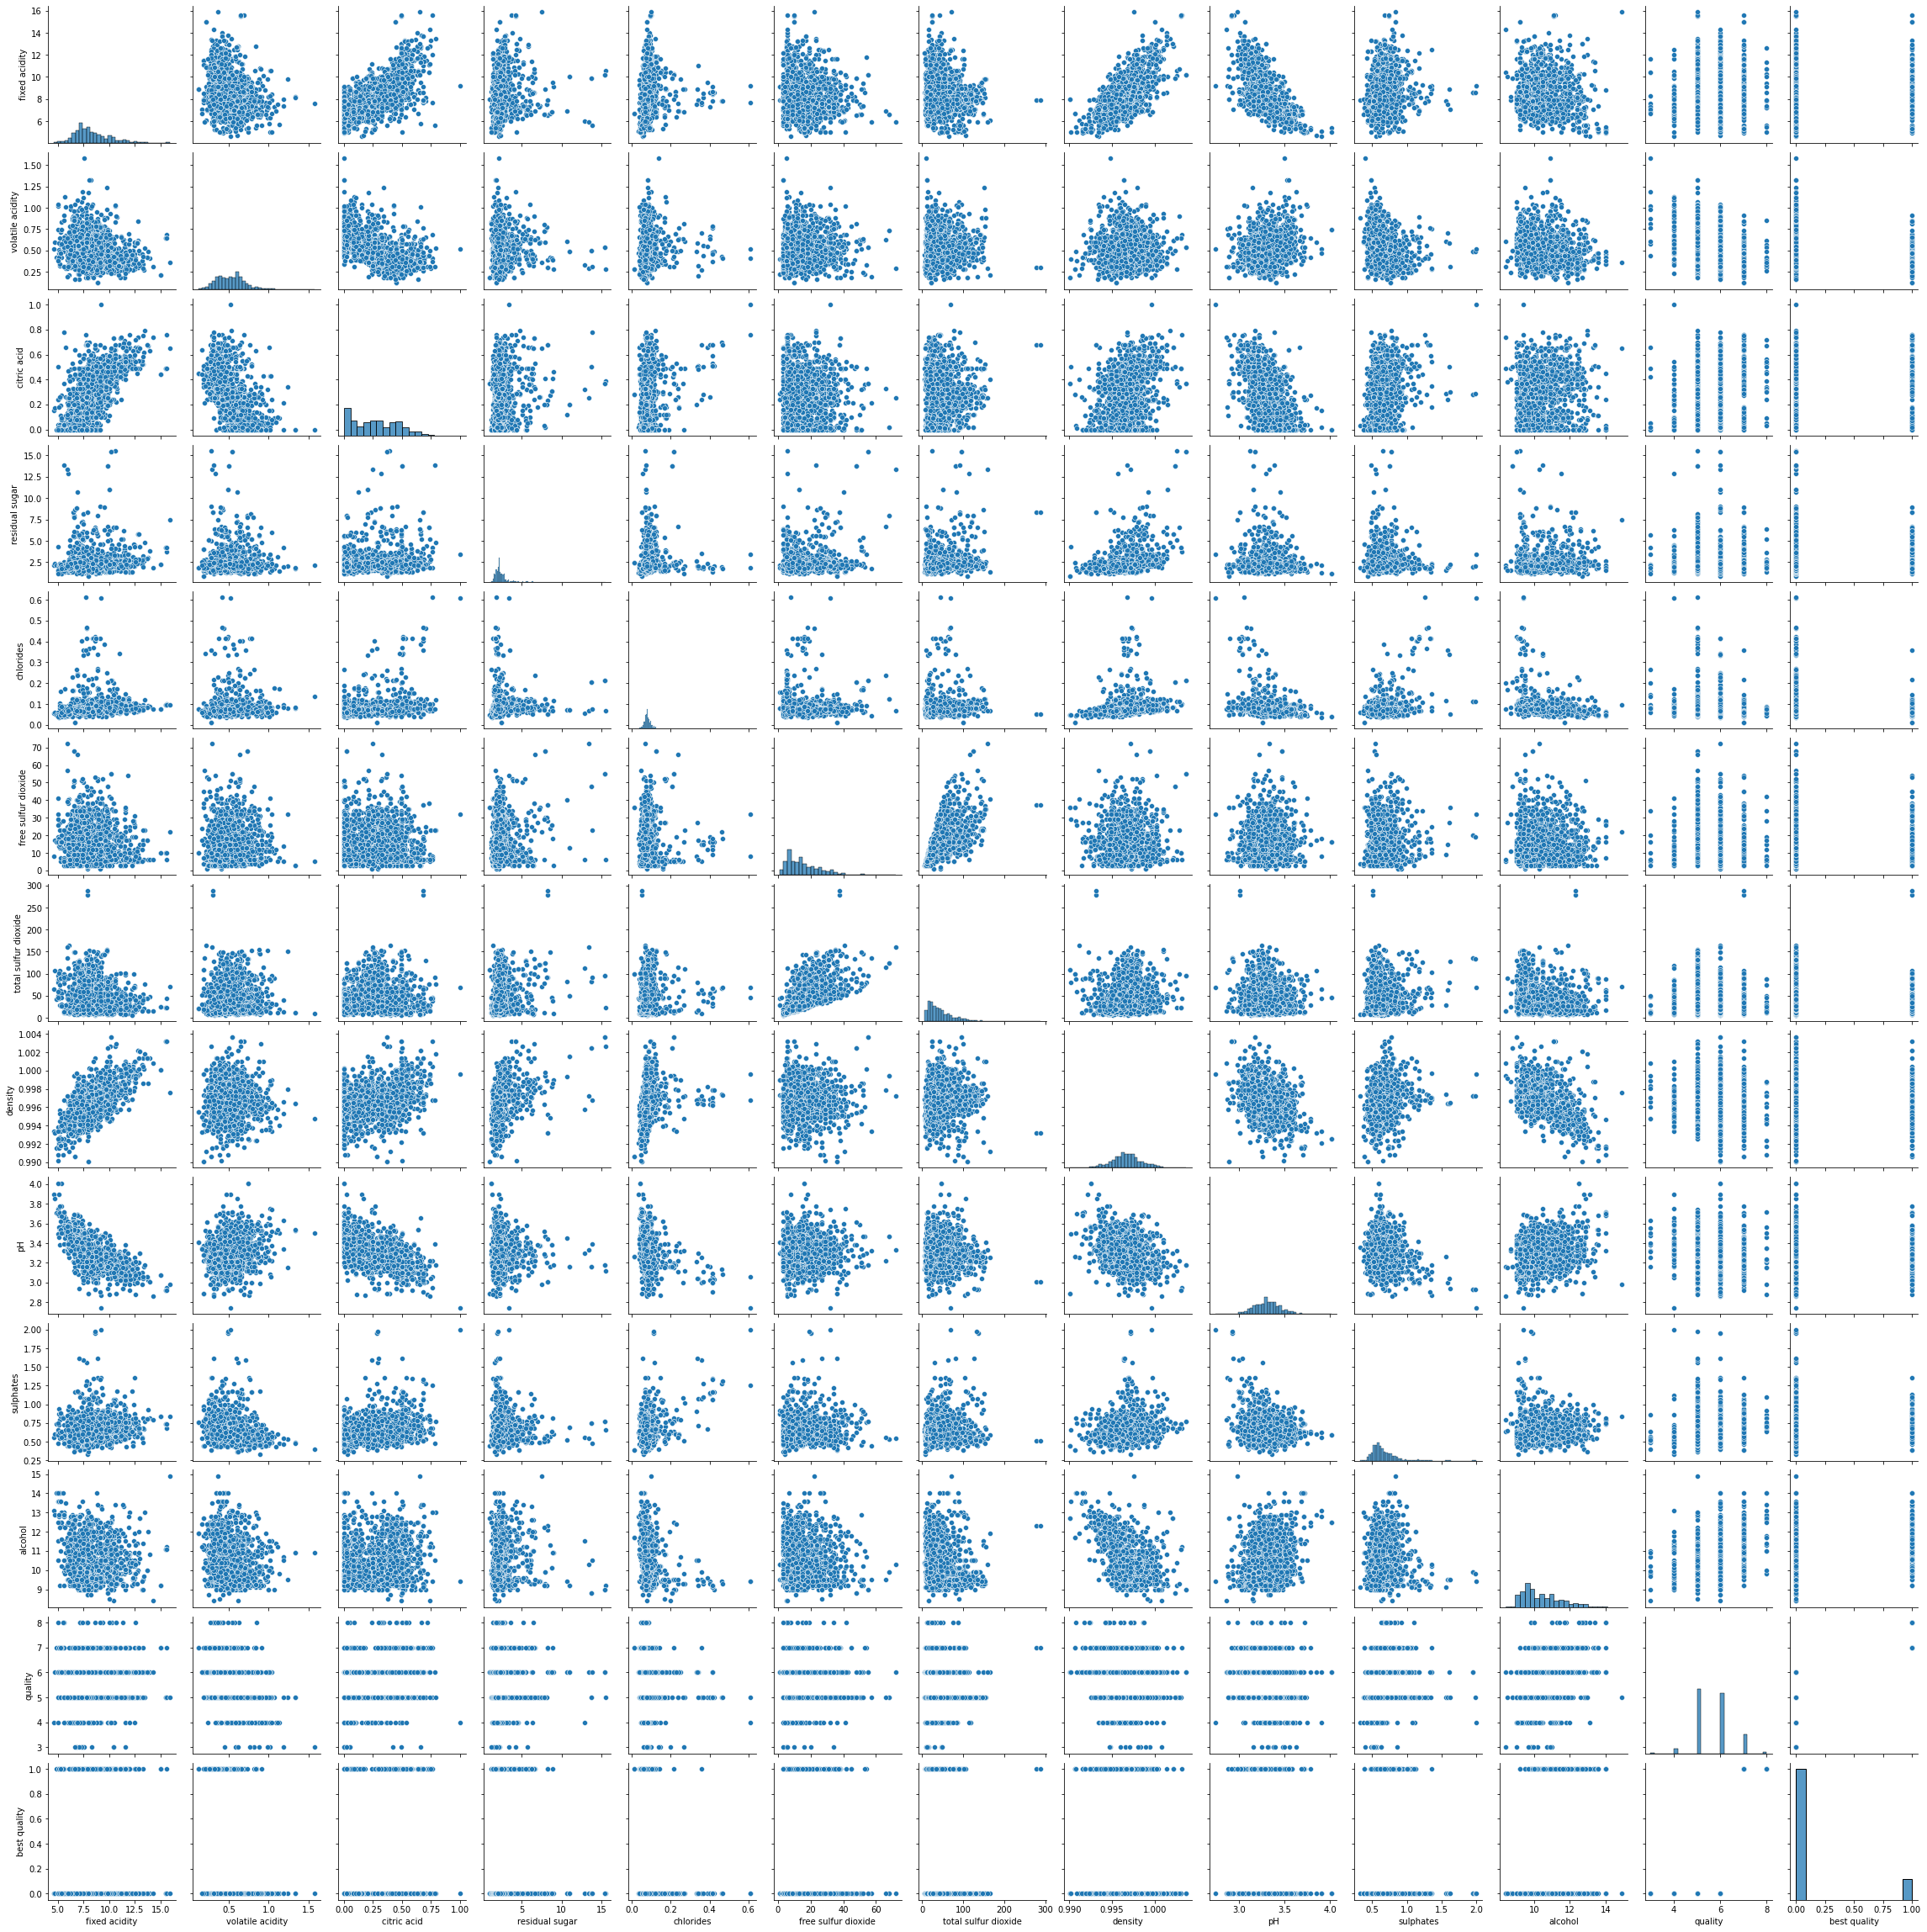

In [132]:
# plot pairplot
sns.pairplot(df)
#show graph
plt.show()

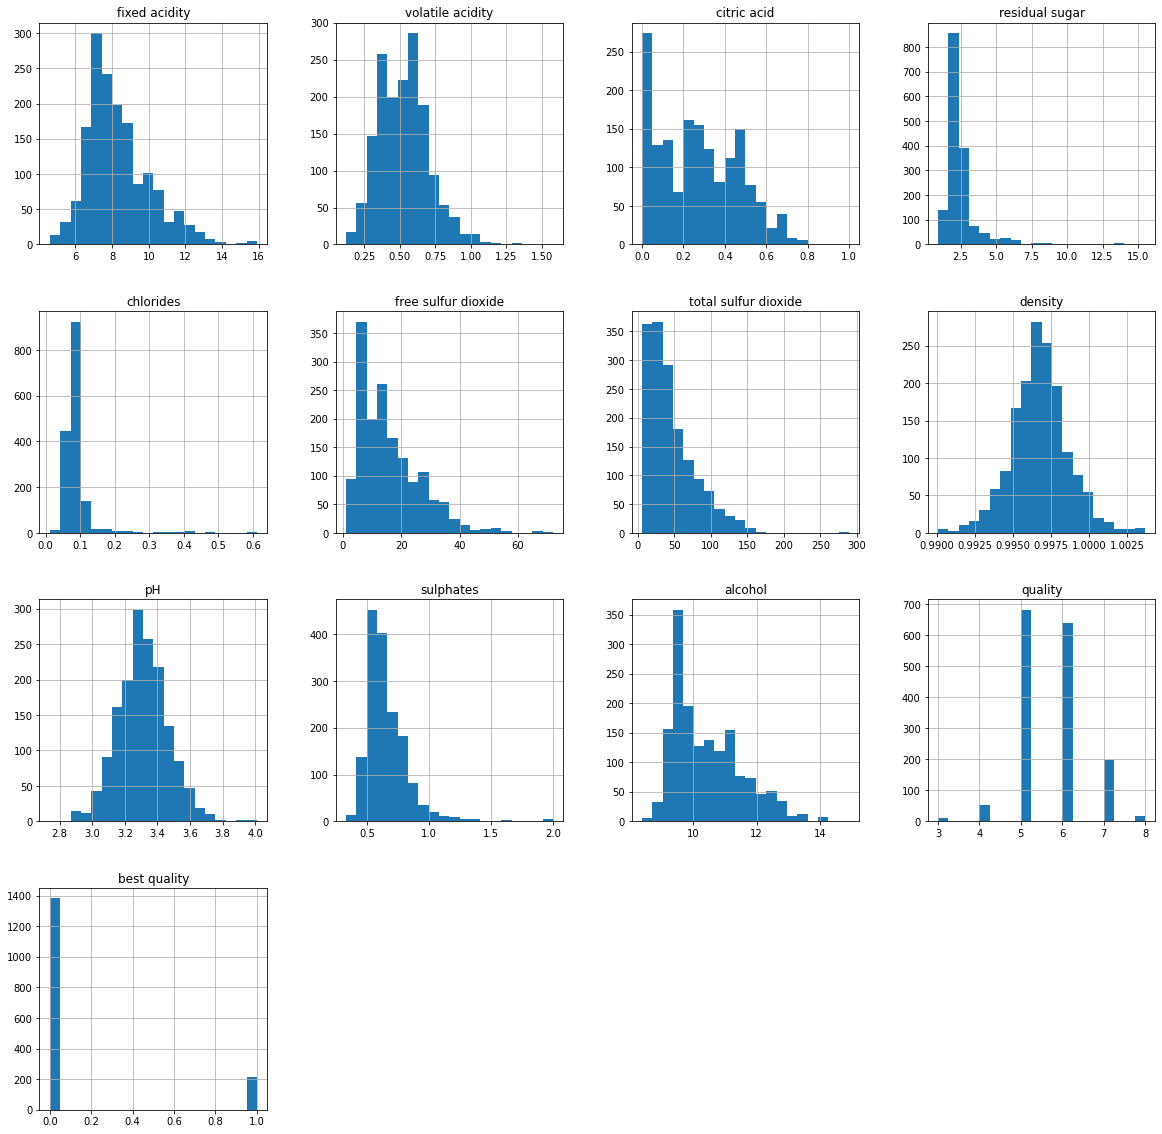

In [133]:
#plot histogram
df.hist(bins=20,figsize=(20,20))
plt.show()

Observation: variable "density", "PH" values distributed normaly remaining variables normaly not distributed

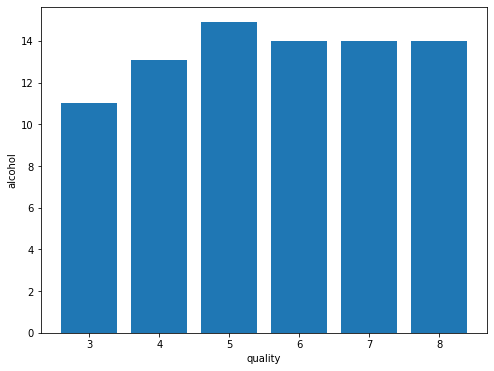

In [134]:
plt.figure(figsize=[8,6])
plt.bar(df['quality'],df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()


Wine quality increases when the alochol quantity increase

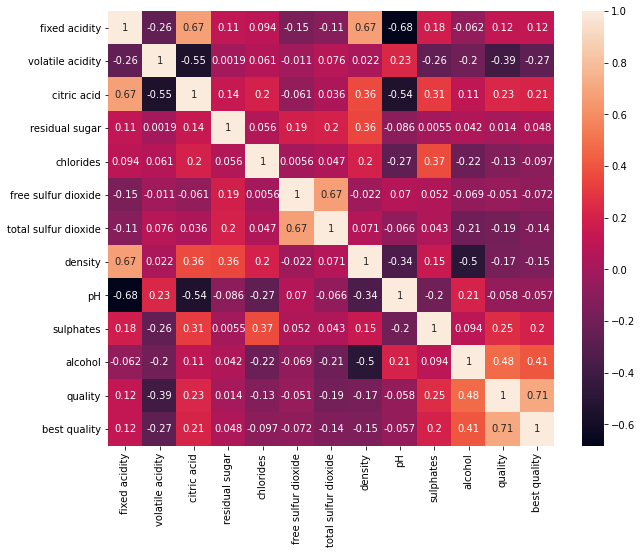

In [135]:
#To check the corr_mat  Heatmap
corr_hmap=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_hmap, annot=True)
plt.show()

Observation:
1. alcohol and quality of the wine quality have positive correlation 0.48
2. fixed acidity  and  dennisty have positve correlation 0.67
3. sulphates and chlorides have positive positivet corelation:0.37

In [136]:
#to display the
corr_matrix=df.corr()
corr_matrix['best quality'].sort_values(ascending = False)


best quality            1.000000
quality                 0.710196
alcohol                 0.407315
citric acid             0.214716
sulphates               0.199485
fixed acidity           0.120061
residual sugar          0.047779
pH                     -0.057283
free sulfur dioxide    -0.071747
chlorides              -0.097308
total sulfur dioxide   -0.139517
density                -0.150460
volatile acidity       -0.270712
Name: best quality, dtype: float64

Observation: 5 variables have negative so relation with target variable and 6 variable have positive corelation with target variable 

In [137]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'best quality'],
      dtype='object')

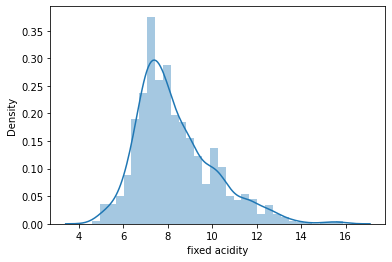

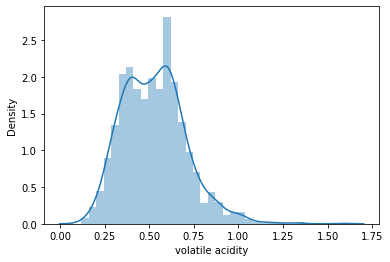

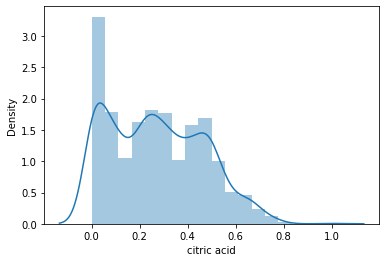

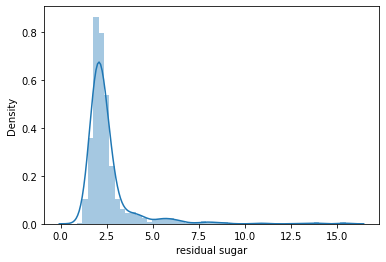

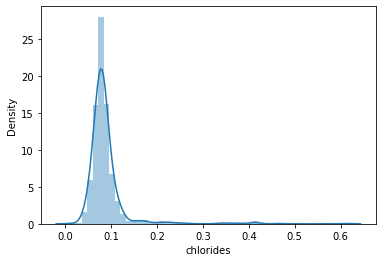

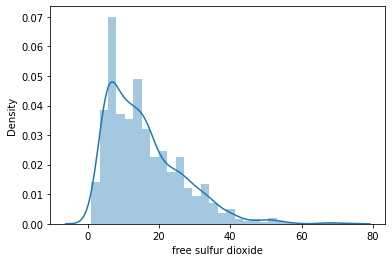

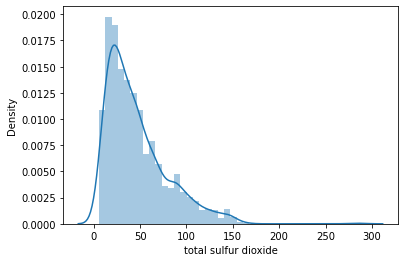

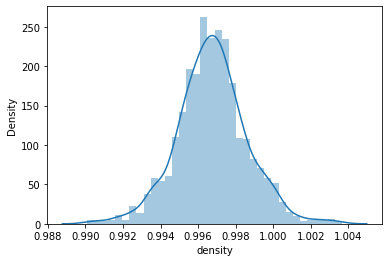

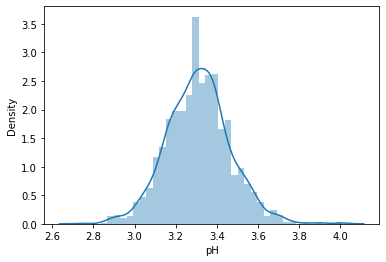

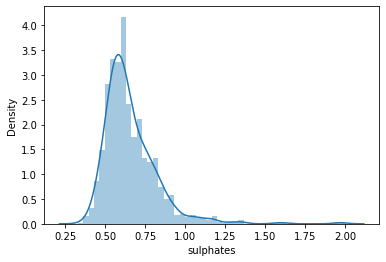

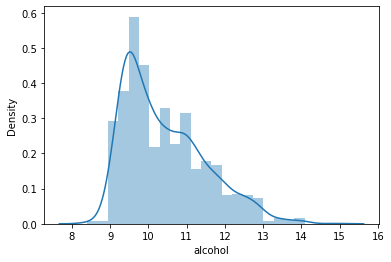

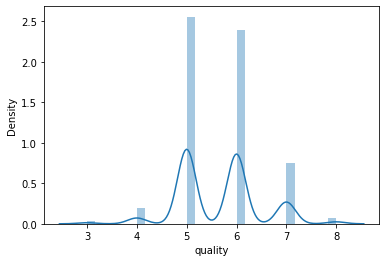

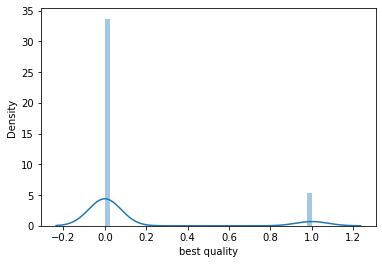

In [138]:
columns =['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'best quality']
        
for i in df[columns]:
    plt.figure()
    sns.distplot(df[i])

Observation:data is distributed normly in PH value and density Remaining all columns data normaly not distributed

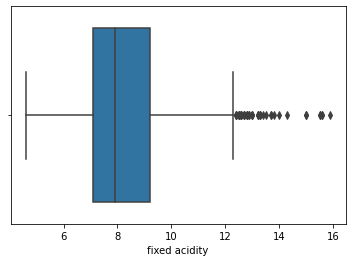

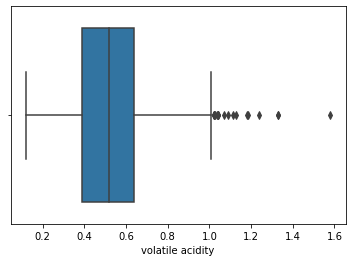

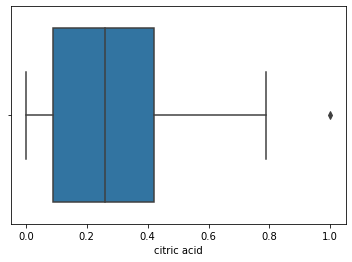

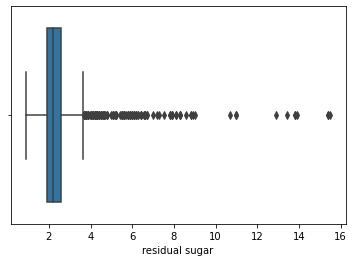

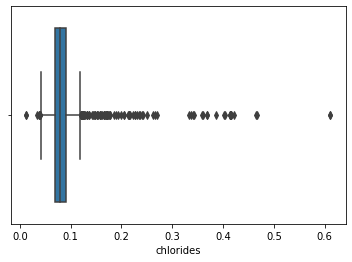

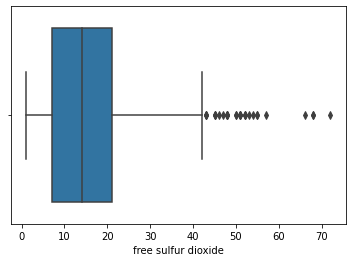

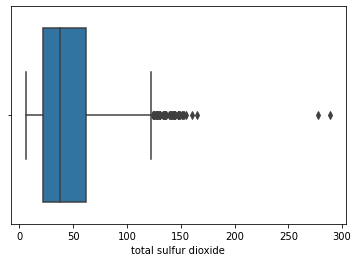

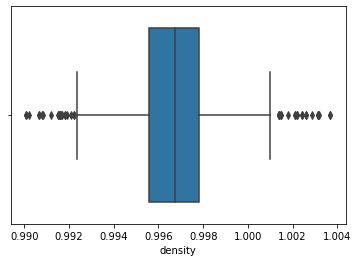

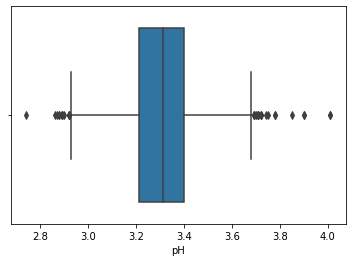

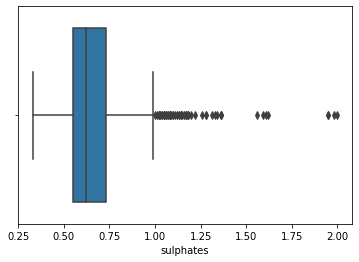

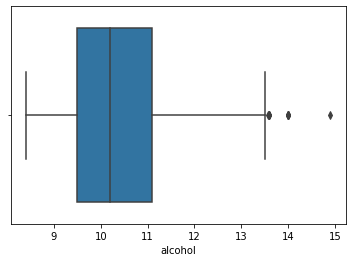

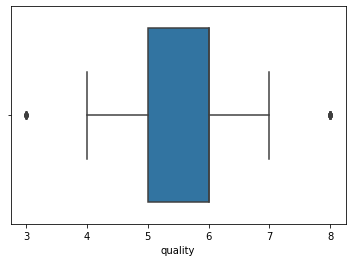

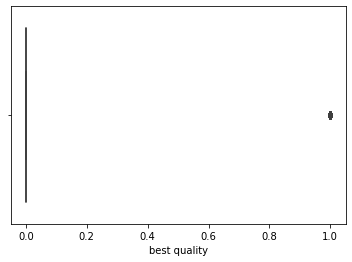

In [139]:
# with the help of box plot checking the outliers in data set 

for i in df[columns]:
    plt.figure()
    sns.boxplot(df[i])

Observation: All variables have outliers need to treat them first

In [140]:
#Spliting the data into x and y

x =df.drop(['quality','best quality'],axis=1)
y=df['best quality']

In [141]:
# creating train test splits
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

#### We use minmax scalar to normalize the data 

In [142]:
# import libraries
#NOrmalizing the data using minmax scaler
  
from sklearn.preprocessing import MinMaxScaler
# creating scaler scale var.
norm = MinMaxScaler()
# fit the scal
norm_fit = norm.fit(x_train)
# transfromation of trainig data
scal_xtrain = norm_fit.transform(x_train)
# transformation of testing data
scal_xtest = norm_fit.transform(x_test)
print(scal_xtrain)

[[0.33628319 0.41322314 0.12       ... 0.50393701 0.33532934 0.52307692]
 [0.3539823  0.4338843  0.25       ... 0.42519685 0.16167665 0.24615385]
 [0.47787611 0.19008264 0.45       ... 0.32283465 0.05988024 0.15384615]
 ...
 [0.23893805 0.43801653 0.         ... 0.51181102 0.08383234 0.24615385]
 [0.28318584 0.33884298 0.33       ... 0.44094488 0.16167665 0.16923077]
 [0.38938053 0.39669421 0.29       ... 0.47244094 0.14371257 0.24615385]]


Handling classs imbalanced problem by oversampling the minority classs

In [143]:
#import library
from collections import Counter
from imblearn.over_sampling import SMOTE
counter =Counter(y_train)
print('Before', counter)

smote = SMOTE()

x_smote, y_smote = smote.fit_resample(x, y)

counter =Counter(y_smote)
print('after', counter)

Before Counter({0: 1110, 1: 169})
after Counter({0: 1382, 1: 1382})


###Decision Tree model 

In [144]:
#decision Tree model 
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
#dt.fit(x_smote,y_smote)   #over sampled data using here
dt.fit(x_train,y_train)
p=dt.predict(x_test)
print(accuracy_score(y_test,p))


0.89375


Observation:
1. we are getting the accuracy 89% using imbalanced data 
2. we getting the accuracy 100% using minority classs balanced data 

In [145]:
#logistic regression 
#Model building
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
#lg.fit(x_smote,y_smote)   #minority class balanced data 
lg.fit(x_train,y_train)
pred =lg.predict(x_test)
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [146]:
print("accuracy_score", accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score 0.8625
[[265   7]
 [ 37  11]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       272
           1       0.61      0.23      0.33        48

    accuracy                           0.86       320
   macro avg       0.74      0.60      0.63       320
weighted avg       0.84      0.86      0.83       320



Observation:
1. we are getting the accuracy 86% using imbalanced data 
2. we getting the accuracy 79% using minority classs balanced data

In [147]:
#AUC ROC CURVE

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score


In [148]:

y_pred_prob =lg.predict_proba(x_test)[:,1]

y_pred_prob


array([0.1895008 , 0.01787574, 0.1264331 , 0.44765896, 0.05842716,
       0.05528567, 0.0999826 , 0.42311601, 0.03847979, 0.04994873,
       0.13254821, 0.08618948, 0.31733793, 0.58871344, 0.0296819 ,
       0.23550671, 0.15829822, 0.01274106, 0.03643142, 0.01814152,
       0.02079616, 0.04271081, 0.0073281 , 0.0441518 , 0.6120063 ,
       0.02873913, 0.0962884 , 0.0256049 , 0.12008866, 0.0321199 ,
       0.02926708, 0.17431161, 0.02252486, 0.0078762 , 0.01940023,
       0.07207014, 0.76517972, 0.01544156, 0.09677295, 0.099676  ,
       0.01861951, 0.09966665, 0.01451004, 0.12426096, 0.1722667 ,
       0.02152235, 0.09530963, 0.287065  , 0.67150735, 0.01336238,
       0.42311601, 0.02168586, 0.02146571, 0.21394069, 0.30954512,
       0.01194059, 0.07771457, 0.09678124, 0.19783536, 0.03149247,
       0.18534273, 0.01521086, 0.0776558 , 0.19988886, 0.07201082,
       0.03540491, 0.01517191, 0.07800092, 0.36399983, 0.53319029,
       0.01907064, 0.02037752, 0.02653792, 0.35890611, 0.19340

In [149]:
fpr,tpr,thresholds =roc_curve(y_test,y_pred_prob)

In [150]:
tpr

array([0.        , 0.        , 0.        , 0.0625    , 0.0625    ,
       0.08333333, 0.08333333, 0.125     , 0.125     , 0.1875    ,
       0.1875    , 0.27083333, 0.27083333, 0.29166667, 0.29166667,
       0.3125    , 0.35416667, 0.4375    , 0.4375    , 0.47916667,
       0.47916667, 0.52083333, 0.52083333, 0.54166667, 0.54166667,
       0.58333333, 0.58333333, 0.60416667, 0.60416667, 0.625     ,
       0.625     , 0.64583333, 0.64583333, 0.66666667, 0.66666667,
       0.6875    , 0.6875    , 0.6875    , 0.70833333, 0.70833333,
       0.77083333, 0.77083333, 0.79166667, 0.79166667, 0.8125    ,
       0.8125    , 0.83333333, 0.83333333, 0.85416667, 0.85416667,
       0.875     , 0.875     , 0.875     , 0.89583333, 0.89583333,
       0.9375    , 0.9375    , 0.9375    , 0.9375    , 0.95833333,
       0.95833333, 0.97916667, 0.97916667, 0.97916667, 0.97916667,
       1.        , 1.        , 1.        , 1.        ])

In [151]:
thresholds

array([1.83150488e+00, 8.31504877e-01, 7.65179722e-01, 6.78152982e-01,
       6.71507349e-01, 6.12006300e-01, 6.00876182e-01, 5.80452586e-01,
       5.70498750e-01, 5.43559796e-01, 5.33190287e-01, 4.83116275e-01,
       4.80282405e-01, 4.73257682e-01, 4.51525673e-01, 4.47658964e-01,
       4.23116010e-01, 3.88070494e-01, 3.67498546e-01, 3.63999828e-01,
       3.54936094e-01, 3.48271757e-01, 3.17337926e-01, 3.09545120e-01,
       3.00094423e-01, 2.85558810e-01, 2.73684521e-01, 2.71831063e-01,
       2.71103905e-01, 2.69120747e-01, 2.46414211e-01, 2.46286089e-01,
       2.44144626e-01, 2.35506714e-01, 1.89709672e-01, 1.89500796e-01,
       1.86032367e-01, 1.81488672e-01, 1.79039936e-01, 1.74311612e-01,
       1.62916829e-01, 1.61299442e-01, 1.58298220e-01, 1.57323447e-01,
       1.46786530e-01, 1.40034762e-01, 1.39946379e-01, 1.32548206e-01,
       1.30385042e-01, 1.23648781e-01, 1.22898620e-01, 1.13514951e-01,
       1.11709405e-01, 1.11158872e-01, 1.08054628e-01, 1.05024033e-01,
      

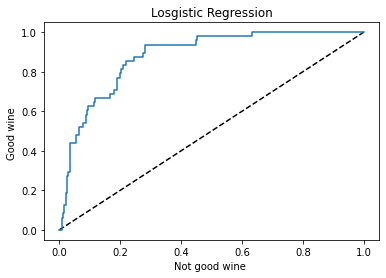

In [152]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('Not good wine ')
plt.ylabel('Good wine ')
plt.title('Losgistic Regression')
plt.show()


In [153]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [154]:
print(auc_score)

0.6017156862745098


Observation: We getting the AUC_SCORE accuracy score is 60%

In [155]:
#cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(dt, x,y, cv=5)
print(score)
print(score.mean())


[0.853125   0.753125   0.86875    0.759375   0.80250784]
0.807376567398119


In [156]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

0.81 accuracy with a standard deviation of 0.05


Observation: cross validetion of decisiontree classification score is 0.81

RandomForest model


In [157]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100)
#rf.fit(x_smote, y_smote)  #balanced data
rf.fit(x_train, y_train)
pred=rf.predict(x_test)
print('accuracy score', pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
0.903125
[[265   7]
 [ 24  24]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       272
           1       0.77      0.50      0.61        48

    accuracy                           0.90       320
   macro avg       0.85      0.74      0.78       320
weighted avg       0.90      0.

Observation:
1. we are getting the accuracy 91% using imbalanced data 
2. we getting the accuracy 100% using minority classs balanced data 

SVM model

In [158]:
#importing the svm model
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)
#svclassifier.fit(x_smote, y_smote)  #balanced data
y_pred = svclassifier.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.903125
[[272   0]
 [ 48   0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       272
           1       0.00      0.00      0.00        48

    accuracy                           0.85       320
   macro avg       0.42      0.50      0.46       320
weighted avg       0.72      0.85      0.78       320



Observation:
1. we are getting the accuracy 100% using imbalanced data 
2. we getting the accuracy 100% using minority classs balanced data 

#### Saving the Model 

SVC model getting the highest accuarcy so we are saving the model

In [1]:
from sklearn.externals import joblib
  
# Save the model as a pickle in a file
joblib.dump(svclassifier, 'svclassifier.pkl')
  
# Load the model from the file
svclassifier_joblib = joblib.load('svclassifier.pkl') 
  
# Use the loaded model to make predictions
#svclassifier_joblib.predict(x_test)


NameError: name 'svclassifier' is not defined